<h1>N_Queens search problem</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

Board with 4 conflicts.


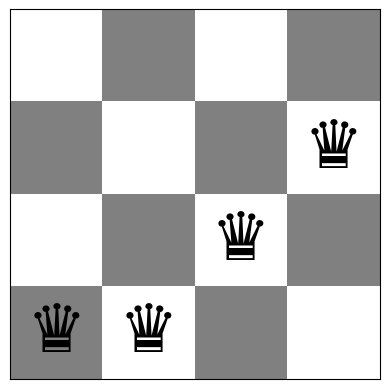

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

Board with 0 conflicts.


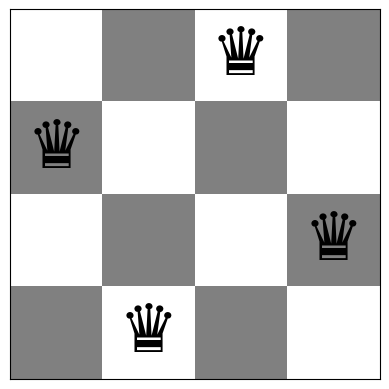

In [3]:
board = [1,3,0,2]
show_board(board)

<h1>Task 1: Steepest-ascend Hill Climbing Search</h1>

Board with 0 conflicts.


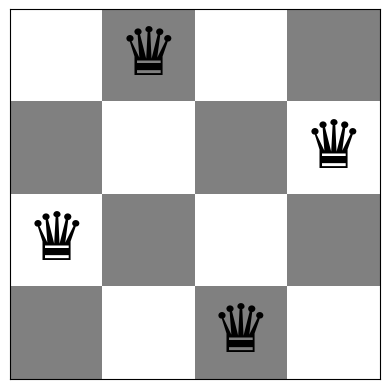

In [4]:
def steepest_ascent(n):
    current = random_board(n)
    while True:
        min = conflicts(current)
        if min == 0:
            return current
        best_successor = current.copy()
        for col in range(n):
            for row in range(n):
                if current[col] != row:
                    successor = current.copy()
                    successor[col] = row
                    successor_conflicts = conflicts(successor)
                    if successor_conflicts < min:
                        min = successor_conflicts
                        best_successor = successor
        if np.array_equal(current, best_successor):
            return current
        current = best_successor


show_board(steepest_ascent(4))

<h1>Task 2: Stochastic Hill Climbing 1</h1>

Board with 3 conflicts.


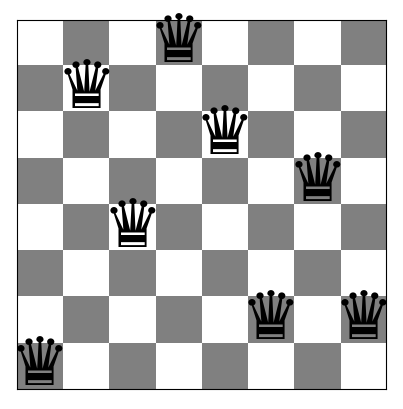

In [5]:
import random

def stochastic_1(n):
    current = random_board(n)
    
    while True:
        min = conflicts(current)
        if min == 0:  
            return current
        
        uphill_moves = []
        for col in range(n):
            for row in range(n):
                if current[col] != row:
                    successor = current.copy()
                    successor[col] = row
                    successor_conflicts = conflicts(successor)
                    if successor_conflicts < min:
                        uphill_moves.append(successor)
        
        if not uphill_moves:
            return current  
        
        current = random.choice(uphill_moves)

show_board(stochastic_1(8))

<h1>Task 3: Stochastic Hill Climbing 2 (first choice)</h1>

Board with 0 conflicts.


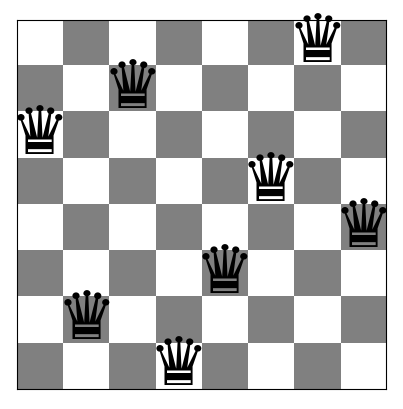

In [6]:
def first_choice(n, max_attempts=100):
    current = random_board(n)
    attempts_since_improvement = 0
    
    while True:
        min = conflicts(current)
        if min == 0:  
            return current
       
        col = random.randint(0, n - 1)
        row = random.randint(0, n - 1)
        while current[col] == row:  
            row = random.randint(0, n - 1)
        neighbor = current.copy()
        neighbor[col] = row
        
        neighbor_conflicts = conflicts(neighbor)
        if neighbor_conflicts < min:
            current = neighbor
            attempts_since_improvement = 0  
        else:
            attempts_since_improvement += 1
        
        if attempts_since_improvement >= max_attempts:
            return current
        
show_board(first_choice(8))

<h1>Task 4: Hill Climbing with Random Restarts</h1>

Board with 0 conflicts.


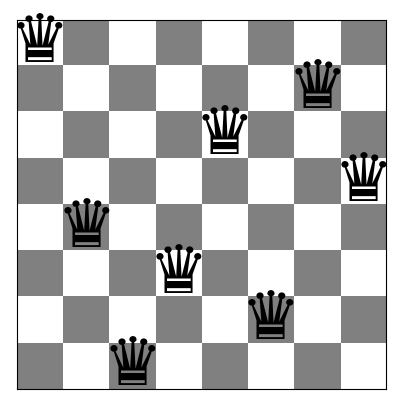

In [7]:
def steepest_random(n, num_restarts=100):
    best_solution = None
    best_conflicts = float('inf')  
    
    for _ in range(num_restarts):
        
        solution = steepest_ascent(n)  
        issues = conflicts(solution)
        
        if issues < best_conflicts:
            best_solution = solution
            best_conflicts = issues
    
    return best_solution

show_board(steepest_random(8))

Board with 0 conflicts.


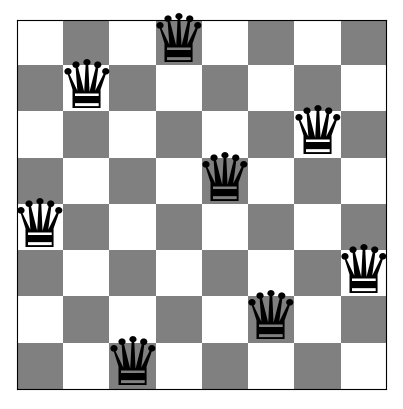

In [8]:
def stochastic_random(n, num_restarts=100):
    best_solution = None
    best_conflicts = float('inf')  
    
    for _ in range(num_restarts):
        
        solution = stochastic_1(n)  
        issues = conflicts(solution)
        
        if issues < best_conflicts:
            best_solution = solution
            best_conflicts = issues
    
    return best_solution

show_board(stochastic_random(8))

Board with 0 conflicts.


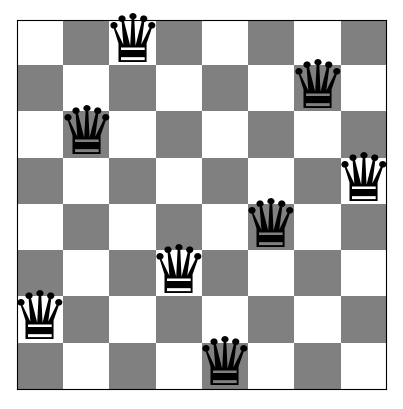

In [9]:
def first_random(n, num_restarts=100):
    best_solution = None
    best_conflicts = float('inf')  
    
    for _ in range(num_restarts):
        
        solution = first_choice(n)  
        issues = conflicts(solution)
        
        if issues < best_conflicts:
            best_solution = solution
            best_conflicts = issues
    
    return best_solution

show_board(first_random(8))

<h1>Task 5: Simulated Annealing</h1>

Board with 0 conflicts.


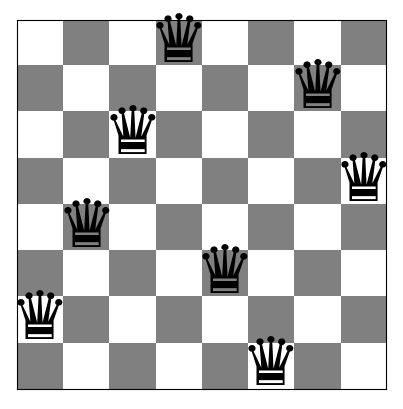

In [10]:
import math

def annealing(n, initial_temperature=0.5, cooling_rate=0.8, max_iterations=5000):
    current_solution = random_board(n)
    current_energy = conflicts(current_solution)
    best_solution = current_solution
    best_energy = current_energy
    
    temperature = initial_temperature
    
    for iteration in range(max_iterations):
        if current_energy == 0:
            return current_solution 

        col = random.randint(0, n - 1)
        row = random.randint(0, n - 1)
        while current_solution[col] == row:
            row = random.randint(0, n - 1)
        neighbor = current_solution.copy()
        neighbor[col] = row
        
        neighbor_energy = conflicts(neighbor)

        if neighbor_energy < current_energy:
            current_solution = neighbor
            current_energy = neighbor_energy

            if neighbor_energy < best_energy:
                best_solution = neighbor
                best_energy = neighbor_energy
        else:
            probability = math.exp((current_energy - neighbor_energy) / temperature)
            if random.random() < probability:
                current_solution = neighbor
                current_energy = neighbor_energy
        
        temperature *= cooling_rate
    
    return best_solution

show_board(annealing(8))

<h1>Performance Comparison</h1>

In [11]:
import time

def performance(algorithm, board_size, runs=200):
    runtime = 0
    total_conflicts = 0
    optimal = 0
    
    for _ in range(runs):
        start_time = time.time()
        solution = algorithm(board_size)
        end_time = time.time()
        
        runtime += round((end_time - start_time)*1000)
        total_conflicts += conflicts(solution)

        if conflicts(solution) == 0:
            optimal += 1
    
    average_runtime = runtime/runs
    average_conflicts = total_conflicts/runs
    optimal_percent = round((optimal/runs)*100)
    
    return average_runtime, average_conflicts, optimal_percent

print("Board Size: 4x4")
average_runtime, average_conflicts, optimal_percent = performance(steepest_ascent, 4)
print("Steepest asc. HC -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs: ", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_1, 4)
print("Stochastic HC 1 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(first_choice, 4)
print("Stochastic HC 2 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(annealing, 4)
print("Annealing -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

print("\nBoard Size: 8x8")
average_runtime, average_conflicts, optimal_percent = performance(steepest_ascent, 8)
print("Steepest asc. HC -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_1, 8)
print("Stochastic HC 1 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(first_choice, 8)
print("Stochastic HC 2 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(annealing, 8)
print("Annealing -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

print("\nBoard Size: 16x16")
average_runtime, average_conflicts, optimal_percent = performance(steepest_ascent, 16)
print("Steepest asc. HC -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_1, 16)
print("Stochastic HC 1 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(first_choice, 16)
print("Stochastic HC 2 -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(annealing, 16)
print("Annealing -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs:", optimal_percent, "%")

Board Size: 4x4
Steepest asc. HC --  Avg. Run Time:  0.05 milleseconds -- Avg. Conflicts:  0.775 -- percent of optimal runs:  31 %
Stochastic HC 1 --  Avg. Run Time:  0.065 milleseconds -- Avg. Conflicts:  0.84 -- percent of optimal runs: 31 %
Stochastic HC 2 --  Avg. Run Time:  1.32 milleseconds -- Avg. Conflicts:  0.78 -- percent of optimal runs: 36 %
Annealing --  Avg. Run Time:  0.48 milleseconds -- Avg. Conflicts:  0.0 -- percent of optimal runs: 100 %

Board Size: 8x8
Steepest asc. HC --  Avg. Run Time:  3.175 milleseconds -- Avg. Conflicts:  1.225 -- percent of optimal runs: 16 %
Stochastic HC 1 --  Avg. Run Time:  4.74 milleseconds -- Avg. Conflicts:  1.315 -- percent of optimal runs: 13 %
Stochastic HC 2 --  Avg. Run Time:  3.92 milleseconds -- Avg. Conflicts:  1.45 -- percent of optimal runs: 12 %
Annealing --  Avg. Run Time:  11.77 milleseconds -- Avg. Conflicts:  0.04 -- percent of optimal runs: 96 %

Board Size: 16x16
Steepest asc. HC --  Avg. Run Time:  43.86 milleseconds

<h1>Other Moves</h1>

Board with 1 conflicts.


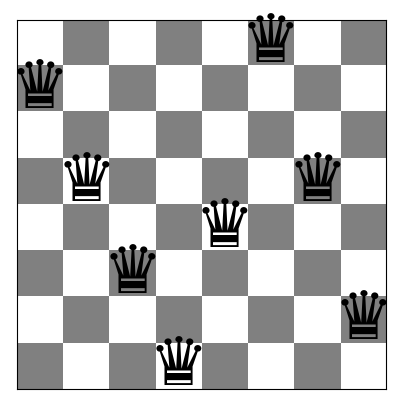

In [12]:
def move_one(board):
    n = len(board)
    new_board = board.copy()
    col = random.randint(0, n - 1)
    row = random.randint(0, n - 1)
    new_board[col] = row
    return new_board

def stochastic_move_one(n, max_attempts=100):
    current = random_board(n)
    attempts_since_improvement = 0
    
    while True:
        min_conflicts = conflicts(current)
        if min_conflicts == 0:
            return current
        
        best = current.copy()
        successor = move_one(current)
        successor_conflicts = conflicts(successor)
        if successor_conflicts < min_conflicts:
            min_conflicts = successor_conflicts
            best = successor
        
        if np.array_equal(current, best):
            attempts_since_improvement += 1
            if attempts_since_improvement >= max_attempts:
                return current
        else:
            current = best
            attempts_since_improvement = 0

show_board(stochastic_move_one(8))

Board with 7 conflicts.


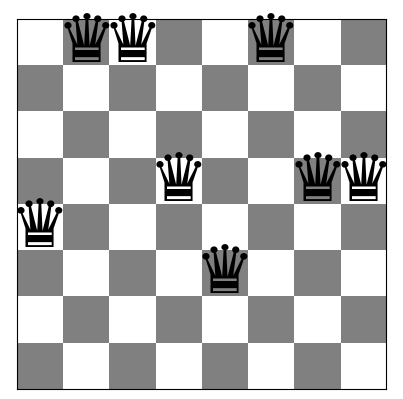

In [13]:
def switch(board):
    n = len(board)
    new_board = board.copy()
    col1, col2 = random.sample(range(n), 2)
    new_board[col1], new_board[col2] = new_board[col2], new_board[col1]
    return new_board

def stochastic_switch(n, max_attempts=100):
    current = random_board(n)
    attempts_since_improvement = 0
    
    while True:
        min_conflicts = conflicts(current)
        if min_conflicts == 0:
            return current
        
        best = current.copy()
        successor = switch(current)
        successor_conflicts = conflicts(successor)
        if successor_conflicts < min_conflicts:
            min_conflicts = successor_conflicts
            best = successor
        
        if np.array_equal(current, best):
            attempts_since_improvement += 1
            if attempts_since_improvement >= max_attempts:
                return current
        else:
            current = best
            attempts_since_improvement = 0

show_board(stochastic_switch(8))

Board with 2 conflicts.


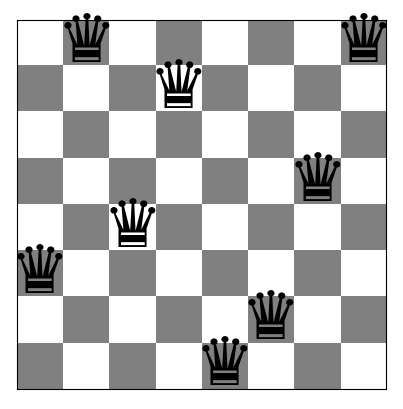

In [14]:
def move_two(board):
    n = len(board)
    new_board = board.copy()
    col1, col2 = random.sample(range(n), 2)
    new_board[col1], new_board[col2] = random.sample(range(n), 2)
    return new_board

def stochastic_move_two(n, max_attempts=100):
    current = random_board(n)
    attempts = 0
    
    while True:
        min = conflicts(current)
        if min == 0:
            return current
        
        best = current.copy()
        successor = move_two(current)
        successor_conflicts = conflicts(successor)
        if successor_conflicts < min:
            min = successor_conflicts
            best = successor
        
        if np.array_equal(current, best):
            attempts += 1
            if attempts >= max_attempts:
                return current
        else:
            current = best
            attempts = 0

show_board(stochastic_move_two(8))

In [16]:
print("Board Size: 4x4")
average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_one, 4)
print("Move One -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_switch, 4)
print("Switching Columns -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_two, 4)
print("Move Two -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

print("\nBoard Size: 8x8")
average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_one, 8)
print("Move One -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_switch, 8)
print("Switching Columns -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_two, 8)
print("Move Two -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

print("\nBoard Size: 16x16")
average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_one, 16)
print("Move One -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_switch, 16)
print("Switching Columns -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

average_runtime, average_conflicts, optimal_percent = performance(stochastic_move_two, 16)
print("Move Two -- ", "Avg. Run Time: ", average_runtime, "milleseconds -- Avg. Conflicts: ", average_conflicts, "-- percent of optimal runs", optimal_percent, "%")

Board Size: 4x4
Move One --  Avg. Run Time:  2.055 milleseconds -- Avg. Conflicts:  0.82 -- percent of optimal runs 35 %
Switching Columns --  Avg. Run Time:  2.665 milleseconds -- Avg. Conflicts:  2.165 -- percent of optimal runs 10 %
Move Two --  Avg. Run Time:  1.265 milleseconds -- Avg. Conflicts:  0.165 -- percent of optimal runs 84 %

Board Size: 8x8
Move One --  Avg. Run Time:  5.185 milleseconds -- Avg. Conflicts:  1.4 -- percent of optimal runs 12 %
Switching Columns --  Avg. Run Time:  4.8 milleseconds -- Avg. Conflicts:  4.41 -- percent of optimal runs 0 %
Move Two --  Avg. Run Time:  6.305 milleseconds -- Avg. Conflicts:  1.56 -- percent of optimal runs 5 %

Board Size: 16x16
Move One --  Avg. Run Time:  12.83 milleseconds -- Avg. Conflicts:  3.3 -- percent of optimal runs 0 %
Switching Columns --  Avg. Run Time:  10.87 milleseconds -- Avg. Conflicts:  9.11 -- percent of optimal runs 0 %
Move Two --  Avg. Run Time:  13.4 milleseconds -- Avg. Conflicts:  4.14 -- percent of o